In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sber = pd.read_csv('yand.txt')
mvid = pd.read_csv('mgn.txt')

In [4]:
sber.head()
sber.shape

(838, 6)

In [5]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MGNT,D,20101001,0,3800.00,12669
1,MGNT,D,20101004,0,3746.97,3899
2,MGNT,D,20101005,0,3669.99,22660
3,MGNT,D,20101006,0,3664.87,1302
4,MGNT,D,20101007,0,3611.27,7101


In [6]:
sber.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [7]:
mvid.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [8]:
data = sber.merge(mvid, on='<DATE>')

In [9]:
data.shape

(838, 11)

In [10]:
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,YNDX,D,20140604,0,1170.0,35146,MGNT,D,0,8970.0,99632
1,YNDX,D,20140605,0,1145.1,24973,MGNT,D,0,8928.8,130492
2,YNDX,D,20140606,0,1163.0,7889,MGNT,D,0,8980.0,166548
3,YNDX,D,20140609,0,1172.1,7304,MGNT,D,0,8949.0,68447
4,YNDX,D,20140610,0,1170.0,3207,MGNT,D,0,9100.0,120241


In [73]:
data.dtypes

<TICKER>_x     object
<PER>_x        object
<DATE>          int64
<TIME>_x        int64
<CLOSE>_x     float64
<VOL>_x         int64
<TICKER>_y     object
<PER>_y        object
<TIME>_y        int64
<CLOSE>_y     float64
<VOL>_y         int64
dtype: object

In [115]:
Y_sber = data["<CLOSE>_x"]
Y_mvid = data["<CLOSE>_y"]

In [116]:
X_sber = sber.drop('<CLOSE>', axis = 1)
X_mvid = mvid.drop('<CLOSE>', axis = 1)

In [117]:
X_sber.head()
#X_mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,YNDX,D,20140604,0,35146
1,YNDX,D,20140605,0,24973
2,YNDX,D,20140606,0,7889
3,YNDX,D,20140609,0,7304
4,YNDX,D,20140610,0,3207


In [175]:
class Parn_reg:
    def __init__(self):
        self.b0 = 150
        self.b1 = 6.5
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        print(X,Y)
        return sum((self.predict(X) - Y) ** 2) / (2*len(X))
    def BGD(self, X, Y):
        steps, errors = [],[]
        alpha = 0.00015
        for i in range(10):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 = self.b0 - alpha*dJ0
            self.b1 = self.b1 - alpha*dJ1
            steps.append(i)
            errors.append(self.error(X,Y))
        return steps,errors

In [176]:
model = Parn_reg()
steps, errors = model.BGD(Y_sber, Y_mvid)
model.predict(Y_sber)
print(steps, errors)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

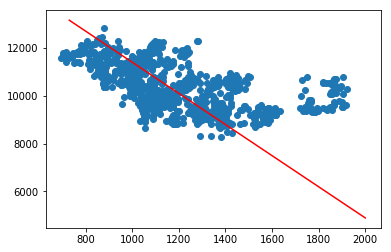

array([2000.        , 1998.48267622, 1996.96535245, 1995.44802867,
       1993.9307049 , 1992.41338112, 1990.89605735, 1989.37873357,
       1987.8614098 , 1986.34408602, 1984.82676225, 1983.30943847,
       1981.7921147 , 1980.27479092, 1978.75746714, 1977.24014337,
       1975.72281959, 1974.20549582, 1972.68817204, 1971.17084827,
       1969.65352449, 1968.13620072, 1966.61887694, 1965.10155317,
       1963.58422939, 1962.06690562, 1960.54958184, 1959.03225806,
       1957.51493429, 1955.99761051, 1954.48028674, 1952.96296296,
       1951.44563919, 1949.92831541, 1948.41099164, 1946.89366786,
       1945.37634409, 1943.85902031, 1942.34169654, 1940.82437276,
       1939.30704898, 1937.78972521, 1936.27240143, 1934.75507766,
       1933.23775388, 1931.72043011, 1930.20310633, 1928.68578256,
       1927.16845878, 1925.65113501, 1924.13381123, 1922.61648746,
       1921.09916368, 1919.5818399 , 1918.06451613, 1916.54719235,
       1915.02986858, 1913.5125448 , 1911.99522103, 1910.47789

In [172]:
X0 = np.linspace(730,2000,838)
Y0 = model.predict(np.flip(X0))

plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, 'r')
plt.show()
np.flip(X0)

In [173]:
model.error(Y_sber, Y_mvid)

     <CLOSE>_x
0       1170.0
1       1145.1
2       1163.0
3       1172.1
4       1170.0
..         ...
833     1848.0
834     1867.0
835     1856.5
836     1873.0
837     1906.5

[838 rows x 1 columns]      <CLOSE>_y
0       8970.0
1       8928.8
2       8980.0
3       8949.0
4       9100.0
..         ...
833    10090.0
834    10163.0
835    10089.0
836    10100.0
837    10085.0

[838 rows x 1 columns]


TypeError: unsupported operand type(s) for +: 'int' and 'str'

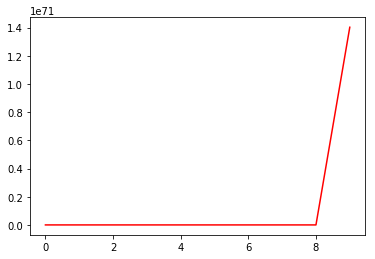

In [174]:
plt.figure()
plt.plot(steps, errors, 'r')
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression

In [137]:
clf = LinearRegression(normalize = True)
Y_sber = pd.DataFrame(data["<CLOSE>_x"])
Y_mvid = pd.DataFrame(data["<CLOSE>_y"])
X0 = np.linspace(740,2000,838)
X0 = pd.DataFrame(X0)
print(X0)

               0
0     740.000000
1     741.505376
2     743.010753
3     744.516129
4     746.021505
..           ...
833  1993.978495
834  1995.483871
835  1996.989247
836  1998.494624
837  2000.000000

[838 rows x 1 columns]


In [138]:
clf.fit(Y_sber, Y_mvid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [139]:
new = clf.predict(X0)

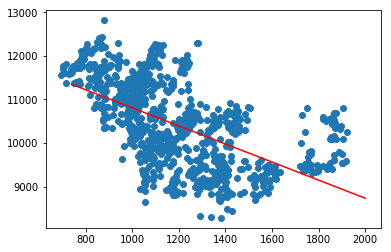

In [140]:
plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, new, 'r')
plt.show()

In [141]:
clf.score(Y_sber, Y_mvid, sample_weight=None)

0.31938228275451963

In [177]:
clf.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)>

In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Y_sber_1 = data["<CLOSE>_x"].values.reshape(-1, 1)
Y_mvid_1 = data["<CLOSE>_y"].values
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(Y_sber_1, Y_mvid_1)
kek = reg.predict(X0.values.reshape(-1, 1))

print(reg.score(Y_sber_1 , Y_mvid_1))
#победил линейную регрессию) Ну а на самом деле- чекать качество выборки по не по тестовой, 
#а по трейновой выборке- так себе затея

0.31932751580482166


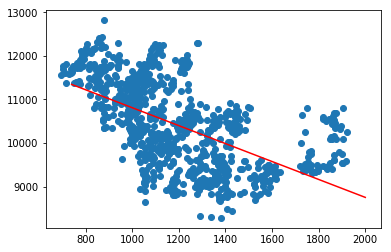

In [62]:
plt.figure()
plt.scatter(Y_sber_1, Y_mvid_1)
plt.plot(X0, kek, 'r')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 8970.   8928.8  8980.   8949.   9100.   9070.   8899.   8799.   8912.
  8890.   8815.   8869.7  9118.   8940.   8898.   8820.   8860.   9068.
  9369.9  9339.9  9249.7  9480.   9550.   9660.   9765.2  9890.   9950.
  9800.   9850.   9640.   9475.   9285.1  9380.   9880.   9999.9  9650.
  9610.   9450.   9240.   9150.   9209.   9340.   9247.   9120.   8648.
  8940.   9025.   9075.   9199.   9260.   9384.   9565.   9550.   9450.
  9700.7  9690.   9698.   9769.9  9669.   9345.   9099.   8900.   9010.
  9409.2  9508.   9750.   9590.   9760.   9810.   9929.   9924.7  9877.
 10000.   9812.   9840.   9650.   9530.   9750.   9940.  10000.   9957.
  9845.5  9920.   9884.9  9770.   9987.  10256.  10059.   9998.  10245.
 10280.  10260.  10390.  10218.1 10150.   9980.   9949.9 10085.  10080.
 10150.  10180.  10240.  10897.  11205.  11370.  11900.  11849.  11855.
 11930.  11750.  11750.  11600.  11830.  11790.  11850.  11750.  11789.8
 11640.  11700.  11752.  11899.  11850.  11899.9 11845.  11795.  11840.
 12300.  12299.  12010.  11525.  11404.  11201.  11350.  11000.  10770.
 10195.  10600.  10050.  10600.  10400.  10000.  10100.  10005.   9964.
 10292.  10160.   9701.   9877.  10400.  10627.  10542.  10689.  11180.
 11450.  11304.  11350.  11235.  11395.  11855.  12070.  11750.  11540.
 11270.  10200.  10550.  10590.  10190.  10400.  10340.  10235.  11075.
 11440.  11490.  11500.  11855.  12250.  11920.  11820.  11766.  11800.
 11796.  11687.  11510.  11574.  11305.  11367.  11650.  11100.  11360.
 11347.  10820.  10835.  10600.  10350.  10350.  10360.  10699.  10500.
 10900.  10550.  10798.  11000.  11140.  11038.  11185.  11350.  11750.
 11971.  11799.  11900.  12020.  11890.  11744.  11711.  12300.  11801.
 11870.  11600.  11520.  11664.  12207.  12135.  11900.  11824.  11577.
 11350.  11458.  11280.  11038.  11083.  11090.  11295.  11220.  11100.
 11240.  11372.  11042.  10986.  10940.  11035.  11020.  10910.  10813.
 10653.  10655.  10510.  10456.  10892.  10765.  10750.  10685.  10654.
 11005.  10895.  11130.  11236.  11556.  11520.  11440.  11385.  11287.
 11266.  11261.  11220.  11680.  11268.  11399.  11465.  11420.  11331.
 11401.  11099.  10902.  11055.  11399.  11649.  11669.  11660.  11769.
 11750.  11510.  11735.  12177.  11885.  11650.  11750.  11671.  11800.
 12040.  12200.  12268.  12441.  12818.  12309.  12396.  12412.  12320.
 12149.  12177.  12147.  12162.  12090.  12050.  12105.  11860.  11603.
 11829.  11631.  11910.  12171.  12275.  11924.  11845.  11935.  11988.
 12074.  11996.  11763.  11420.  11405.  11313.  11325.  11583.  11650.
 11543.  11462.  11360.  11377.  11387.  11815.  11566.  11705.  11600.
 11769.  11581.  11725.  11797.  11763.  11696.  11730.  11667.  11780.
 11810.  12059.  11707.  11665.  11810.  11800.  11772.  11500.  10809.
 11359.  11491.  11216.  11136.  11111.  11425.  11468.  11496.  11520.
 11393.  11255.  11125.  11192.  11290.  11390.  11359.  11427.  11819.
 12250.  11900.  12022.  12130.  12013.  12005.  11901.  12199.  12270.
 11799.  11728.  11590.  11180.  11141.  11039.  11030.  11340.  11361.
 11211.  10656.  10790.  10780.  10850.  10761.  10732.  10743.  10972.
 11228.  11366.  11350.  11320.  10667.  10367.  10352.  10230.   9640.
  9940.  10427.  10350.  10850.  11050.  11042.  10975.  11285.  11485.
 11500.  11270.  11150.  10955.  10889.  10765.  10450.  10103.  10070.
 10143.  10000.   9920.   9900.  10000.  10318.  10354.  10346.  10655.
 10475.  10530.  10589.  10648.  10592.  10695.  10715.  10668.  10715.
 10700.  10900.  10900.  10780.  10880.  10788.  10900.  11400.  11255.
 11200.  11100.  11041.  10880.  10655.  10575.  10410.  10550.  10470.
 10470.  10400.  10390.  10332.  10320.  10254.  10129.  10490.  10240.
 10132.  10125.  10075.  10115.  10162.  10295.   9540.   9180.   8825.
  9040.   9002.   9006.   9151.   9093.   9038.   8921.   8834.   9036.
  9430.   9352.   9301.   9200.   9075.   8975.   9150.   9140.   9201.
  9466.   9408.   9340.   9255.   9190.   9150.   9260.   9388.   9200.
  8830.   8819.   8660.   8929.   8755.   8750.   8850.   8709.   8488.
  8450.   8280.   8320.   8300.   8700.   9012.   9101.   9145.   8950.
  8760.   8753.   9261.   9348.   9404.   9460.   9508.   9461.   9250.
  9104.   9225.   9400.   9365.  10100.  10475.  10020.  10292.  10210.
 10381.  10347.  10368.  10450.  10690.  10927.  10846.  10751.  10673.
 10800.  10835.  10532.  10400.  10380.  10260.  10589.  10643.  10250.
 10289.  10376.  10492.  10475.  10262.  10308.  10544.  10734.  10615.
 10670.  10743.  10544.  10372.  10291.  10205.  10167.  10269.  10339.
 10350.  10648.  10700.  10600.  10789.  10432.  10555.  10530.  10391.
 10539.  10507.  10490.  10590.  10411.  10491.  10351.  10245.  10219.
 10144.  10100.  10535.  10567.  10605.  10525.  10526.  10430.  10405.
 10450.  10551.  10630.  10530.  10421.  10360.   9740.   9860.   9651.
  9850.   9910.   9870.   9920.  10138.  10267.  10351.  10380.  10450.
 10487.  10430.  10420.  10380.  10290.  10500.  10297.  10350.  10550.
 10649.  10580.  10730.  10423.  10350.  10693.  10602.  10532.  10720.
 10597.  10709.  10750.  10411.  10408.  10327.  10400.  10665.  10795.
 11000.  11347.  11220.  10875.  10900.  10819.  10534.  10000.   9880.
  9640.   9830.   9825.   9695.   9800.   9730.   9694.   9690.   9625.
 10020.   9900.   9625.   9650.   9700.   9495.   9580.   9640.   9550.
  9577.   9862.  10002.  10078.  10030.  10000.   9930.   9700.   9577.
  9540.   9194.   8825.   9190.   9133.   9150.   9250.   9175.   9250.
  9233.   9061.   9155.   9235.   9270.   9346.   9700.   9700.   9780.
  9730.   9440.   9370.   9350.   9351.   9600.   9327.   9580.   9261.
  9313.   9261.   9470.   9550.   9430.   9360.   9265.   9100.   9160.
  8985.   9135.   9113.   9000.   9110.   9070.   9008.   8825.   8823.
  8825.   8776.   8821.   8685.   8841.   8900.   9140.   9010.   8985.
  9180.   9238.   9440.   9255.   9190.   9413.   9280.   9205.   9359.
  9450.   9300.   9240.   9197.   9070.   8875.   8989.   9053.   9204.
  9270.   9435.   9589.   9588.   9449.   9412.   9539.   9613.   9499.
  9330.   9280.   9301.   9504.   9471.   9103.   9180.   9115.   9105.
  9165.   9200.   9313.   9360.   9370.   9340.   9545.   9720.   9618.
  9600.   9530.   9504.   9405.   9598.   9540.   9750.   9797.   9680.
  9525.   9372.   9470.   9428.   9321.   9401.   9497.   9407.   9333.
  9358.   9370.   9360.   9470.   9447.   9335.   9492.   9556.   9744.
  9812.   9799.  10000.  10247.  10650.  10800.  10590.  10510.  10630.
 10540.  10544.  10527.  10680.  10795.  10700.  10434.  10397.  10320.
 10376.  10465.  10340.  10260.  10140.  10090.  10163.  10089.  10100.
 10085. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.